### **Exploración y preprocesamiento de datos**

Datos iniciales:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose    

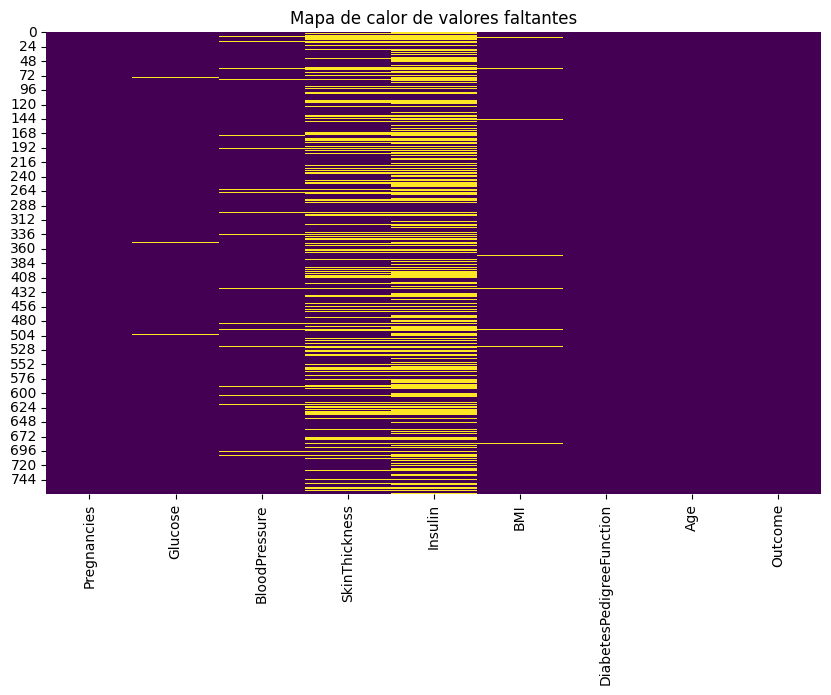


Justificación: Los valores faltantes en estas columnas son imputados en lugar de eliminarlos, ya que la eliminación podría reducir significativamente el tamaño del conjunto de datos.

Justificación adicional: Se usa la media para 'Glucose', ya que su distribución no presenta tantos outliers. Para 'BloodPressure' y otras columnas, se usa la mediana para evitar el sesgo causado por outliers.

Valores faltantes después de la imputación:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Visualización de distribuciones individuales de las características:


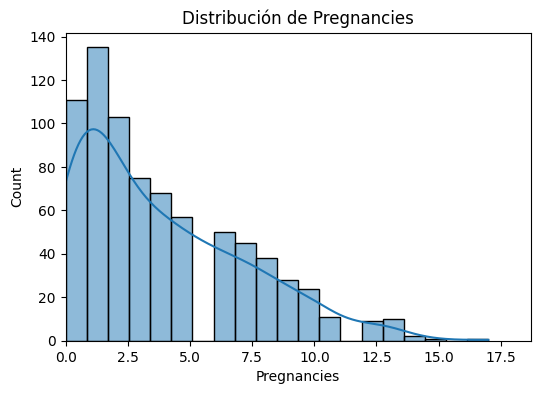

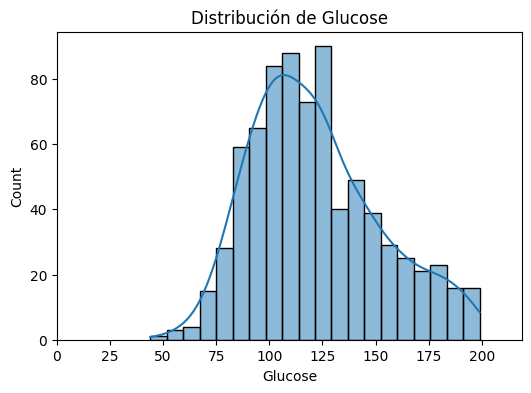

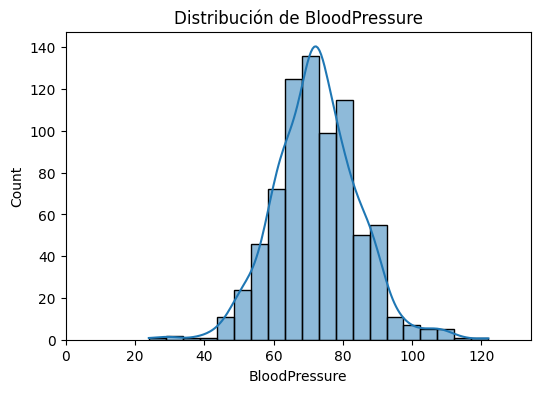

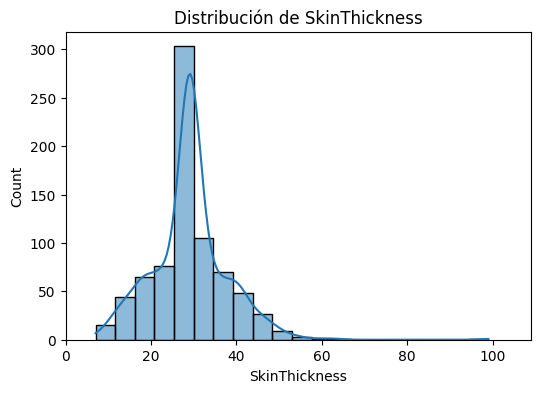

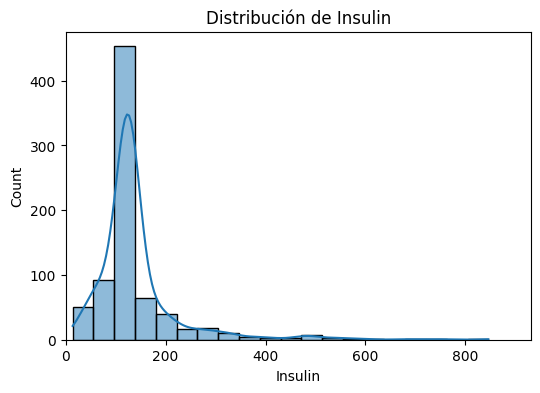

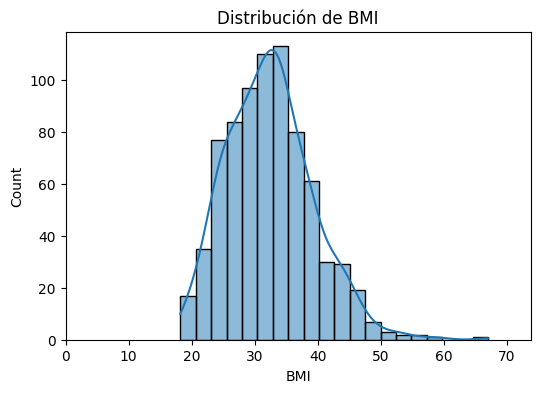

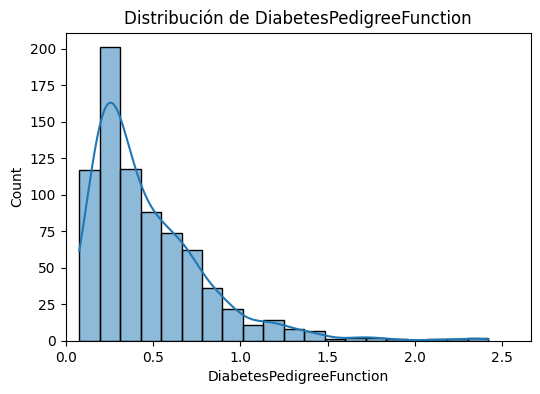

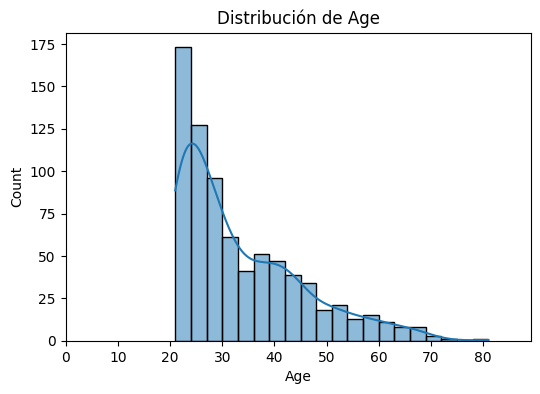

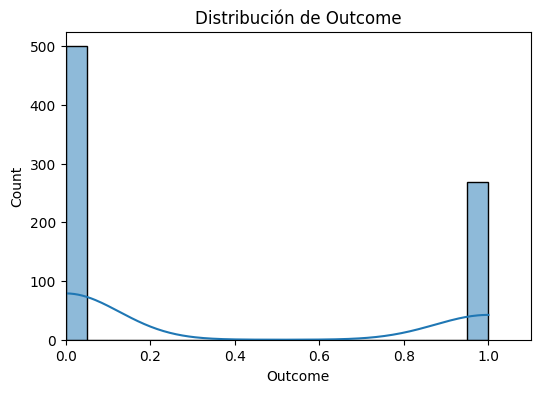

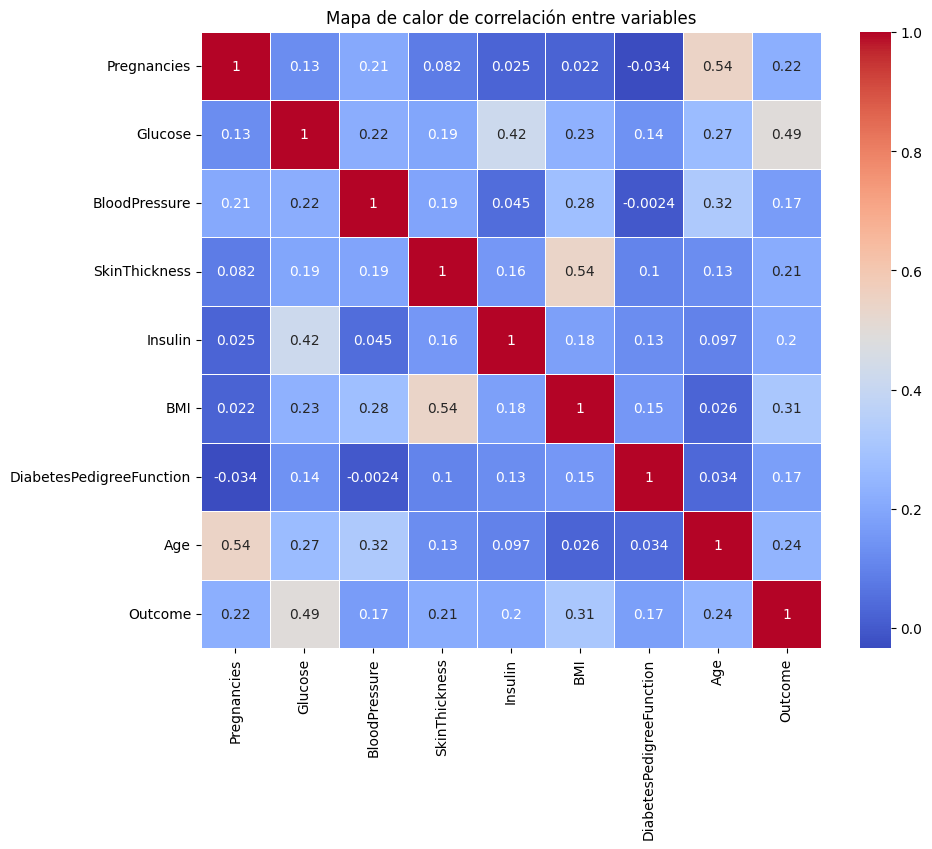


Distribución de clases (0: No tiene diabetes, 1: Tiene diabetes):


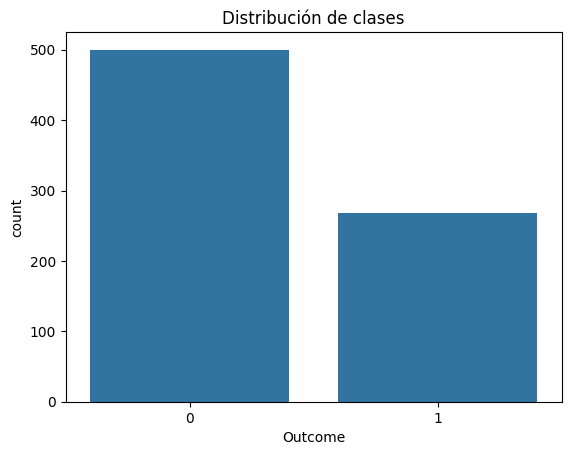


Distribución de clases en porcentaje:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

Nota: Un desbalance de clases significativo podría requerir técnicas como submuestreo o sobremuestreo para balancear el conjunto de datos.

Detección de outliers usando diagramas de caja para las columnas relevantes:


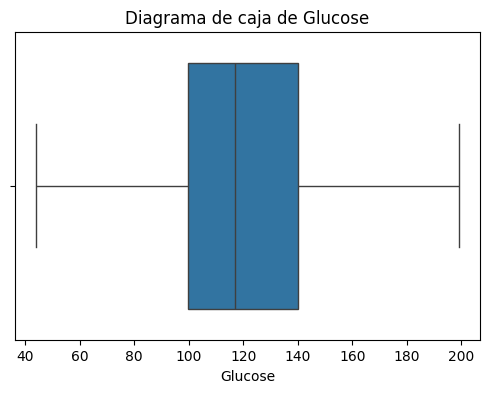

Outliers detectados en Glucose: 0 (0.00% del total)


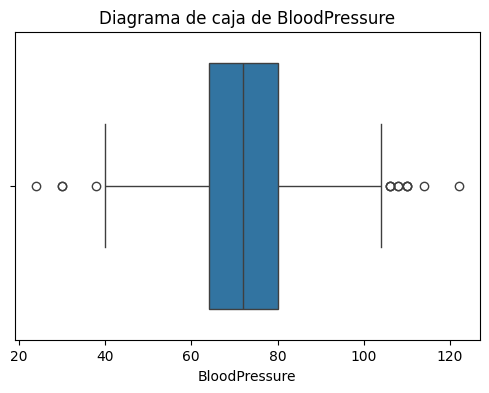

Outliers detectados en BloodPressure: 14 (1.82% del total)


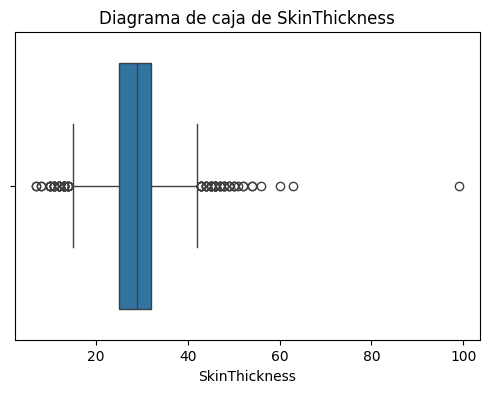

Outliers detectados en SkinThickness: 87 (11.33% del total)


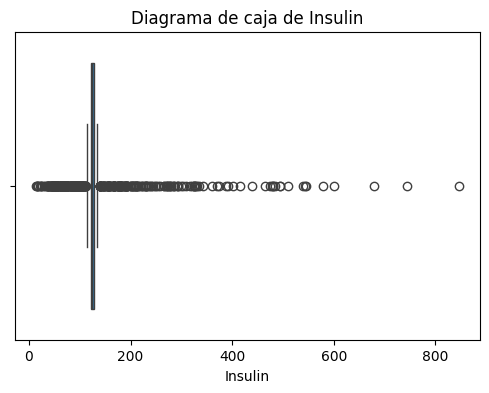

Outliers detectados en Insulin: 346 (45.05% del total)


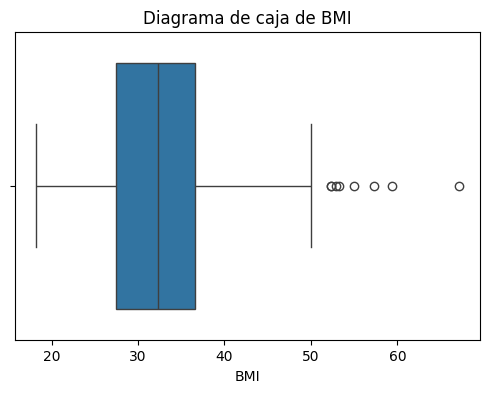

Outliers detectados en BMI: 8 (1.04% del total)

Exploración de relaciones entre variables:


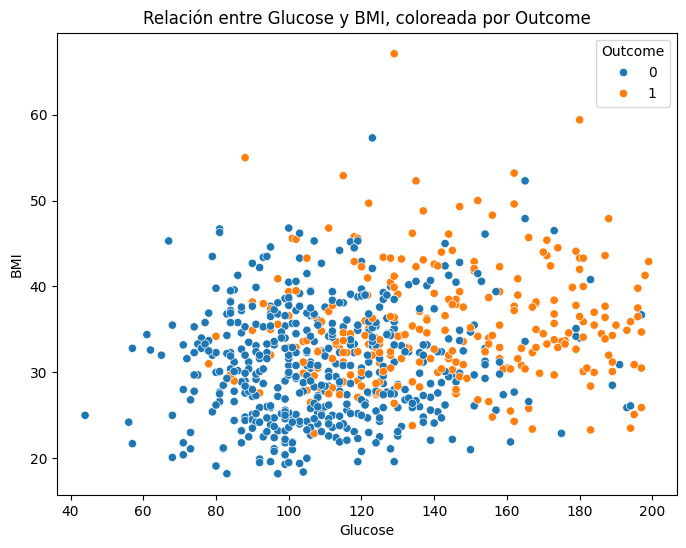

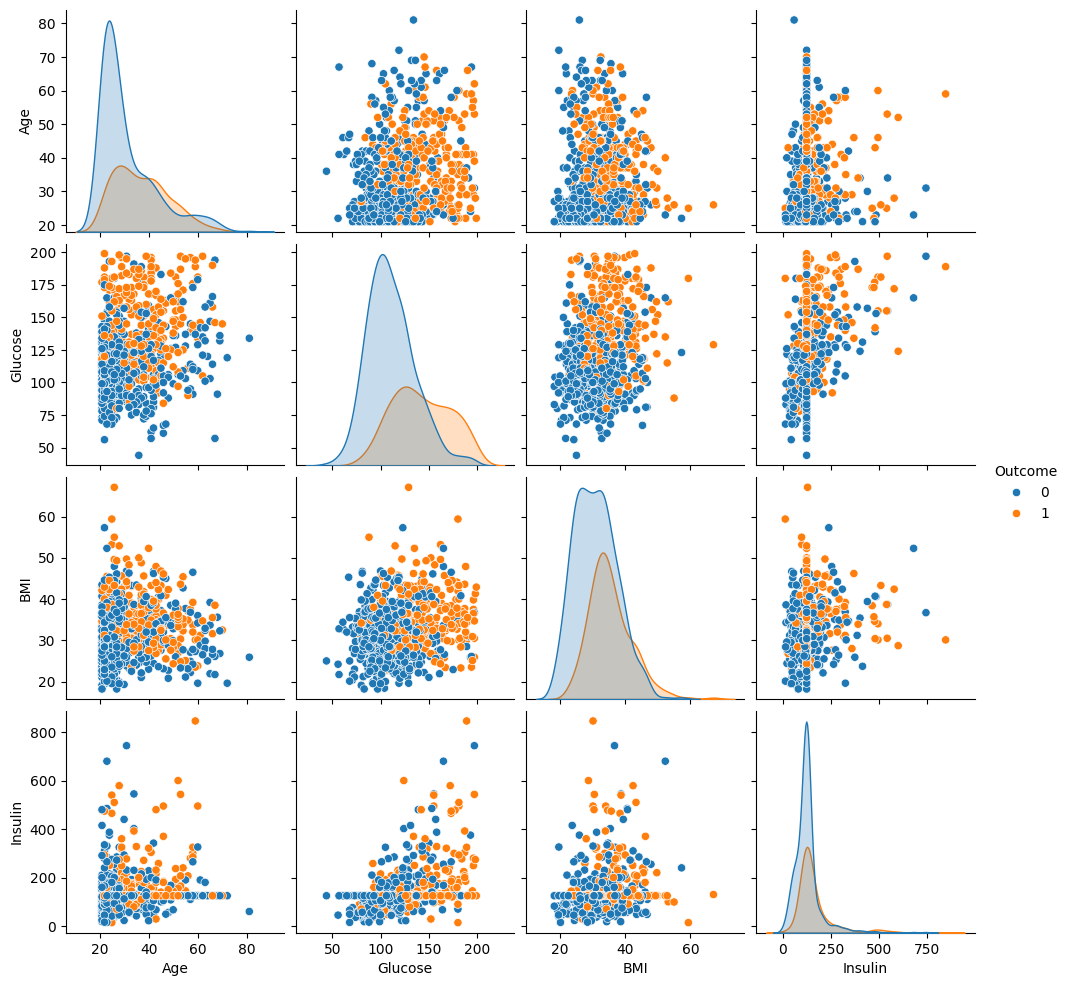


Forma del conjunto de entrenamiento: (537, 8), (537,)
Forma del conjunto de validación: (115, 8), (115,)
Forma del conjunto de prueba: (116, 8), (116,)

Justificación: La estratificación asegura que el balance de clases se mantenga en los subconjuntos de entrenamiento, validación y prueba, evitando el sesgo en la evaluación del modelo.

Distribución de clases en el conjunto de entrenamiento:
Outcome
0    65.176909
1    34.823091
Name: proportion, dtype: float64

Distribución de clases en el conjunto de validación:
Outcome
0    65.217391
1    34.782609
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
Outcome
0    64.655172
1    35.344828
Name: proportion, dtype: float64

Estadísticas del conjunto de entrenamiento:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age
count   537.000000  537.000000     537.000000     537.000000  537.000000  537.000000                537.000000  537.000

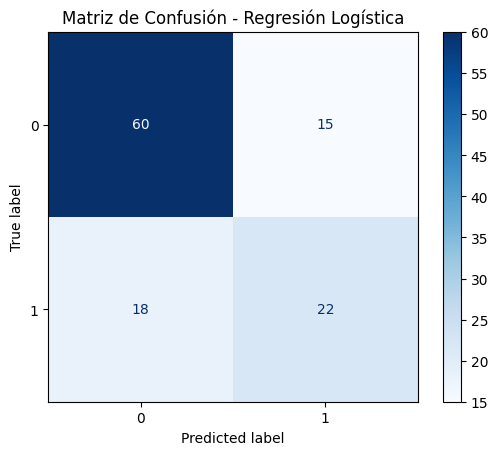


Entrenando el modelo de K-Nearest Neighbors (KNN)...

Resultados del modelo de KNN:
Accuracy: 0.7043
Precision: 0.5789
Recall: 0.5500


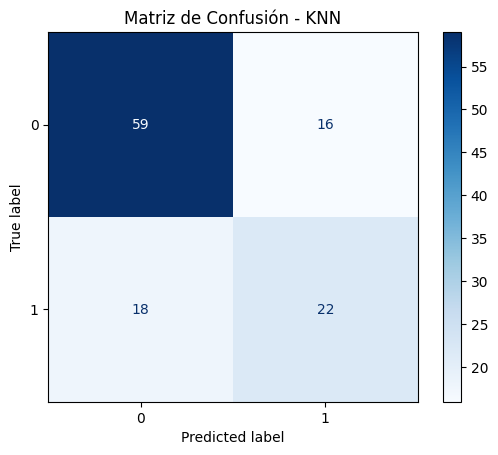


Optimizando hiperparámetros de KNN...
Mejores parámetros para KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Resultados del modelo optimizado de KNN:
Accuracy: 0.6957
Precision: 0.5641
Recall: 0.5500


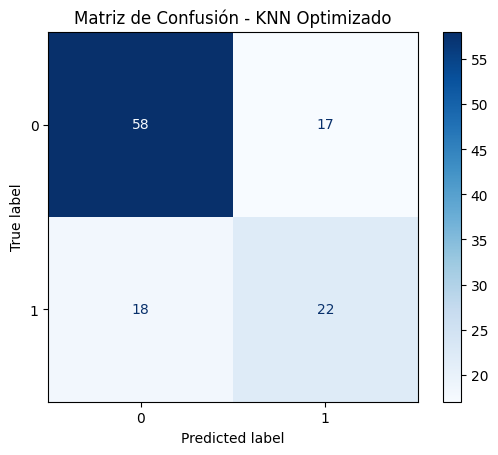


Evaluación final con el conjunto de prueba...

Resultados finales de Regresión Logística en el conjunto de prueba:
Accuracy: 0.7759
Precision: 0.7778
Recall: 0.5122


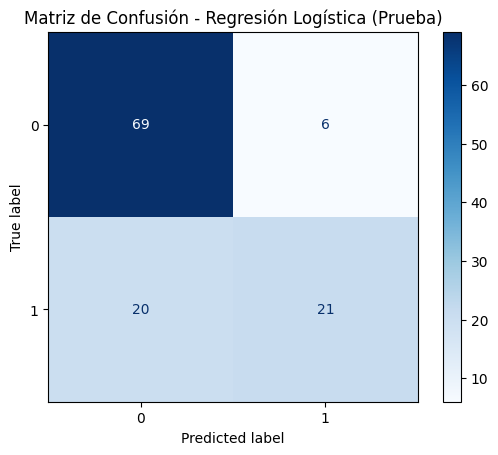


Resultados finales de KNN optimizado en el conjunto de prueba:
Accuracy: 0.7328
Precision: 0.6471
Recall: 0.5366


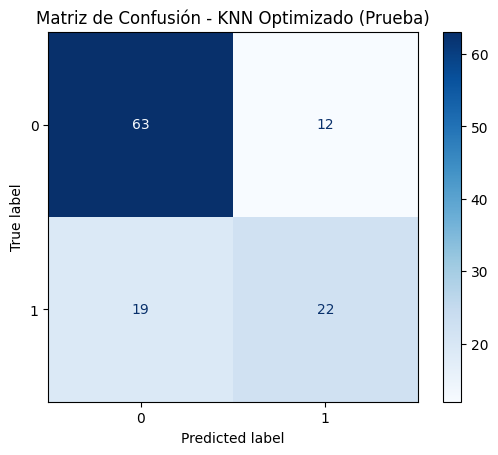

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# 1. Cargar el archivo CSV
# Cargamos los datos desde un archivo CSV para comenzar el análisis y manipulación del conjunto de datos.
pd.set_option('display.width', 1000)
dataframe = pd.read_csv('diabetes.csv')
print("Datos iniciales:")
print(dataframe.head())  # Muestra los primeros registros para una vista rápida de cómo están estructurados los datos.

# 2. Exploración inicial del conjunto de datos
# Provee una vista general del conjunto de datos, permitiendo observar el tipo de variables y detectar posibles valores problemáticos.
print("\nInformación general del conjunto de datos:")
print(dataframe.info())  # Muestra información sobre el tipo de datos y si hay valores faltantes.

print("\nDescripción estadística básica:")
print(dataframe.describe())  # Estadísticas básicas como media, desviación estándar, percentiles para identificar outliers o problemas de escala.

# Valores únicos por columna para identificar posibles problemas
print("\nValores únicos por columna:")
print(dataframe.nunique())  # Verifica cuántos valores únicos tiene cada columna, útil para detectar variables categóricas o errores.

# 3. Revisión y manejo de valores faltantes
# Se identifican las columnas donde 0 es un valor fisiológicamente improbable, y por lo tanto, se consideran como valores faltantes.
print("\nJustificación: Valores de 0 son considerados inválidos para ciertas columnas, ya que es fisiológicamente improbable que una persona tenga, por ejemplo, 0 de glucosa o presión arterial.")
cols_reemplazo = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nValores faltantes por columna (considerando los 0 como faltantes en algunas columnas):")
print((dataframe[cols_reemplazo] == 0).sum())  # Muestra cuántos valores de 0 hay en las columnas seleccionadas.

# Reemplazar ceros por NaN donde corresponde
# Los valores de 0 se reemplazan por NaN para tratarlos adecuadamente en los pasos de imputación.
dataframe[cols_reemplazo] = dataframe[cols_reemplazo].replace(0, np.nan)

# Verificar valores faltantes después del reemplazo
print("\nValores faltantes después del reemplazo de 0:")
print(dataframe.isnull().sum())  # Verifica cuántos valores faltantes hay después del reemplazo.

# Visualización de valores faltantes
# Un mapa de calor es útil para visualizar rápidamente qué partes del conjunto de datos tienen valores faltantes.
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

# Justificación de por qué no eliminamos filas con valores faltantes
# Se elige la imputación en lugar de eliminación para evitar la pérdida de datos valiosos y reducir el tamaño del conjunto.
print("\nJustificación: Los valores faltantes en estas columnas son imputados en lugar de eliminarlos, ya que la eliminación podría reducir significativamente el tamaño del conjunto de datos.")

# 4. Imputación de valores faltantes usando la media o mediana con justificación
# Se justifica el uso de la media o la mediana según la naturaleza de la distribución de cada variable.
print("\nJustificación adicional: Se usa la media para 'Glucose', ya que su distribución no presenta tantos outliers. Para 'BloodPressure' y otras columnas, se usa la mediana para evitar el sesgo causado por outliers.")
dataframe['Glucose'] = dataframe['Glucose'].fillna(dataframe['Glucose'].mean())  # Media para variables sin muchos outliers.
dataframe['BloodPressure'] = dataframe['BloodPressure'].fillna(dataframe['BloodPressure'].median())  # Mediana para evitar sesgo.
dataframe['SkinThickness'] = dataframe['SkinThickness'].fillna(dataframe['SkinThickness'].median())
dataframe['Insulin'] = dataframe['Insulin'].fillna(dataframe['Insulin'].median())
dataframe['BMI'] = dataframe['BMI'].fillna(dataframe['BMI'].median())

# Verificar que no queden valores faltantes
print("\nValores faltantes después de la imputación:")
print(dataframe.isnull().sum())  # Verifica si la imputación fue exitosa y no quedan valores faltantes.

# 5. Exploración detallada de características
# Graficamos las distribuciones individuales de cada característica para observar la dispersión de los datos.
print("\nVisualización de distribuciones individuales de las características:")
for column in dataframe.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe[column], kde=True, bins=20)  # Un histograma con KDE para visualizar la forma de la distribución.
    plt.title(f'Distribución de {column}')
    plt.xlim(0, dataframe[column].max() * 1.1)  # Ajustar límites del eje X para ver mejor la distribución completa.
    plt.show()

# Mapa de calor de correlación entre variables
# Visualizamos la correlación entre las variables para detectar relaciones importantes entre las características.
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Se destaca con anotaciones el valor de la correlación.
plt.title('Mapa de calor de correlación entre variables')
plt.show()

# 6. Evaluación del balance de clases
# Se grafica la distribución de la variable objetivo para verificar si el conjunto de datos está desbalanceado.
print("\nDistribución de clases (0: No tiene diabetes, 1: Tiene diabetes):")
sns.countplot(x='Outcome', data=dataframe)
plt.title('Distribución de clases')
plt.show()

# Mostrar el porcentaje de cada clase
# Verificamos qué porcentaje de los datos pertenece a cada clase, lo que nos ayuda a identificar si necesitamos técnicas adicionales.
print("\nDistribución de clases en porcentaje:")
print(dataframe['Outcome'].value_counts(normalize=True) * 100)

# Nota sobre el balance de clases
# Si las clases están desbalanceadas, podríamos necesitar ajustar el modelo o aplicar técnicas como sobremuestreo/submuestreo.
print("\nNota: Un desbalance de clases significativo podría requerir técnicas como submuestreo o sobremuestreo para balancear el conjunto de datos.")

# 7. Detección de outliers usando diagramas de caja
# Utilizamos diagramas de caja para detectar valores atípicos, que pueden afectar el rendimiento del modelo.
print("\nDetección de outliers usando diagramas de caja para las columnas relevantes:")
for column in cols_reemplazo:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataframe[column])  # Un boxplot para visualizar outliers basados en el IQR.
    plt.title(f'Diagrama de caja de {column}')
    plt.show()

    # Detección de outliers utilizando el rango intercuartílico (IQR)
    # Calculamos los valores atípicos con el IQR (Interquartile Range) para cada columna relevante.
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < (Q1 - 1.5 * IQR)) | (dataframe[column] > (Q3 + 1.5 * IQR))]
    porcentaje_outliers = (len(outliers) / len(dataframe)) * 100
    print(f"Outliers detectados en {column}: {len(outliers)} ({porcentaje_outliers:.2f}% del total)")

# 8. Exploración de relaciones entre variables
# Las relaciones entre variables nos permiten identificar posibles interacciones importantes para la predicción.
print("\nExploración de relaciones entre variables:")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=dataframe)  # Un scatter plot para explorar la relación entre dos variables clave.
plt.title('Relación entre Glucose y BMI, coloreada por Outcome')
plt.show()

# Pares de variables para explorar relaciones adicionales
sns.pairplot(dataframe, hue='Outcome', vars=['Age', 'Glucose', 'BMI', 'Insulin'])  # Utilizamos pairplots para analizar múltiples relaciones.
plt.show()

# Justificación adicional: Las relaciones entre variables como 'Glucose' y 'BMI' pueden ser clave para entender los factores de riesgo de diabetes.

# 9. Separación de datos para entrenamiento, validación y prueba
# Dividimos los datos en características (X) y objetivo (y) para preparar la división en los diferentes conjuntos.
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']

# División de datos en entrenamiento, validación y prueba
# Estratificamos los datos para asegurar que las proporciones de la clase se mantengan en los conjuntos de datos.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Verificar las formas de los conjuntos
# Revisamos las dimensiones de cada conjunto de datos para asegurarnos de que la partición fue correcta.
print(f"\nForma del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Forma del conjunto de validación: {X_val.shape}, {y_val.shape}")
print(f"Forma del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# Justificación sobre la estratificación de clases
# La estratificación garantiza que las proporciones de clases en los subconjuntos sean consistentes, evitando sesgos en el modelo.
print("\nJustificación: La estratificación asegura que el balance de clases se mantenga en los subconjuntos de entrenamiento, validación y prueba, evitando el sesgo en la evaluación del modelo.")

# 10. Verificación del balance de clases en los conjuntos de entrenamiento, validación y prueba
# Función para verificar el balance de clases en cada conjunto de datos después de la partición.
def check_class_balance(y, label):
    print(f"\nDistribución de clases en el conjunto de {label}:")
    print(y.value_counts(normalize=True) * 100)

check_class_balance(y_train, "entrenamiento")
check_class_balance(y_val, "validación")
check_class_balance(y_test, "prueba")

# 11. Estadísticas básicas de los conjuntos de datos
# Estadísticas descriptivas de cada conjunto, que proporcionan información sobre la distribución de las características.
print("\nEstadísticas del conjunto de entrenamiento:")
print(X_train.describe())
print("\nEstadísticas del conjunto de validación:")
print(X_val.describe())
print("\nEstadísticas del conjunto de prueba:")
print(X_test.describe())


# 12.1 Entrenamiento de Modelo de Regresión Logística
print("\nEntrenando el modelo de Regresión Logística...")

# Definir el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Verificación del modelo con el conjunto de validación
y_val_pred_logreg = log_reg.predict(X_val)

# Evaluación del modelo de Regresión Logística
print("\nResultados del modelo de Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_logreg):.4f}")

# Mostrar matriz de confusión para Regresión Logística
cm_logreg = confusion_matrix(y_val, y_val_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# 12.2 Entrenamiento de Modelo K-Nearest Neighbors (KNN)
print("\nEntrenando el modelo de K-Nearest Neighbors (KNN)...")

# Definir el modelo KNN con hiperparámetros predeterminados
knn = KNeighborsClassifier()

# Ajustar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Verificación del modelo con el conjunto de validación
y_val_pred_knn = knn.predict(X_val)

# Evaluación del modelo KNN
print("\nResultados del modelo de KNN:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_knn):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_knn):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_knn):.4f}")

# Mostrar matriz de confusión para KNN
cm_knn = confusion_matrix(y_val, y_val_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN")
plt.show()

# 13. Optimización de hiperparámetros para KNN
print("\nOptimizando hiperparámetros de KNN...")

# Definir los hiperparámetros a buscar
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Aplicar GridSearchCV para encontrar los mejores parámetros
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo KNN con GridSearch
grid_knn.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros para KNN: {grid_knn.best_params_}")

# Evaluación del modelo optimizado de KNN con el conjunto de validación
y_val_pred_best_knn = grid_knn.predict(X_val)

# Evaluación del modelo KNN optimizado
print("\nResultados del modelo optimizado de KNN:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_best_knn):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_best_knn):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_best_knn):.4f}")

# Mostrar matriz de confusión para KNN optimizado
cm_best_knn = confusion_matrix(y_val, y_val_pred_best_knn)
ConfusionMatrixDisplay(cm_best_knn).plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN Optimizado")
plt.show()

# 14. Evaluación final con el conjunto de prueba
print("\nEvaluación final con el conjunto de prueba...")

# Evaluar el modelo de Regresión Logística en el conjunto de prueba
y_test_pred_logreg = log_reg.predict(X_test)
print("\nResultados finales de Regresión Logística en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_logreg):.4f}")

# Mostrar matriz de confusión para Regresión Logística en el conjunto de prueba
cm_test_logreg = confusion_matrix(y_test, y_test_pred_logreg)
ConfusionMatrixDisplay(cm_test_logreg).plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística (Prueba)")
plt.show()

# Evaluar el modelo optimizado de KNN en el conjunto de prueba
y_test_pred_best_knn = grid_knn.predict(X_test)
print("\nResultados finales de KNN optimizado en el conjunto de prueba:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_best_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_best_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_best_knn):.4f}")

# Mostrar matriz de confusión para KNN optimizado en el conjunto de prueba
cm_test_best_knn = confusion_matrix(y_test, y_test_pred_best_knn)
ConfusionMatrixDisplay(cm_test_best_knn).plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN Optimizado (Prueba)")
plt.show()

### **Modelo y evaluación**